# '''Algunos de los paths de este jupyter no existen.'''

# Pruebas para sacar el dataset de € 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import ndimage
from PIL import Image
import scipy.signal
import glob
import pickle
import cv2
import os

## 1. Primer vistazo a las imagenes

(150, 150)

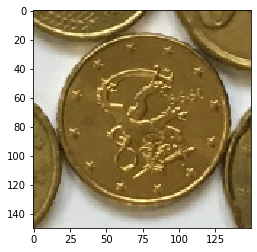

In [2]:
img1 = Image.open('./Inputs/coins/10c/test_12_53.jpg')
plt.imshow(img1)
img1.size

In [3]:
img1_arr = np.array(img1)
img1_arr.shape

(150, 150, 3)

In [4]:
img_rot = np.flipud(img1_arr)
len(img_rot)

150

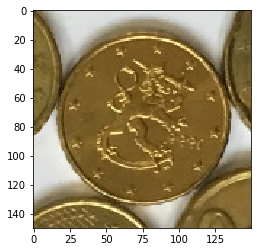

In [5]:
plt.imshow(img_rot)

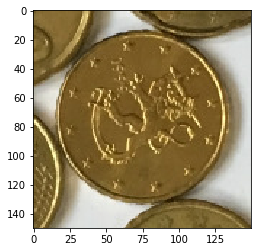

In [6]:
img_90 = ndimage.rotate(img1_arr, 90)
plt.imshow(img_90)

In [7]:
dirpath =os.getcwd()

In [8]:
os.path.basename(dirpath)

'Change-my-money'

In [9]:
# Prueba para sacar la path de cada foto
basedir_prueba = "./Inputs/coins/10c"
images_1c = os.listdir(basedir_prueba)
for im in images_1c[:4]:
    print(basedir_prueba+"/"+im)


./Inputs/coins/10c/img_90_264.jpg
./Inputs/coins/10c/img_90_270.jpg
./Inputs/coins/10c/img_90_258.jpg
./Inputs/coins/10c/test_18_30.jpg


In [10]:
# numero de imagenes en la carpeta
images_1c_test = os.listdir("./Inputs/coins/10c")
len(images_1c_test)

1002

In [11]:
# nombre de las labels que vamos a utilizar
labels_type = os.listdir('./Inputs/coins')
labels_type

['10c',
 '50c',
 'coins-dataset-master.zip',
 '.DS_Store',
 '20c',
 '5c',
 'nuevas',
 '2c',
 'coins-dataset-master',
 '1e',
 'many-in-one-picture',
 '1c',
 '2e']

In [12]:
# Los tipos de monedas que vamos a tener como labels 
labels_t = ['10c','50c','20c','5c','2c','1e','1c','2e']
origin_path = "./Inputs/coins"

In [154]:
# Importamos y aplicamos la función readImages(path,labels) para sacar el array, label y path de cada moneda
from src.imgModifier import readImages

imagenes,img_label,img_path = readImages(origin_path,labels_t)

In [155]:
# Comprobamos que ha funcionado
print('Imagenes: ',len(imagenes), ' Ej shape: ', imagenes[0].shape)
print('Labels: ', len(img_label),' Ej: ', img_label[0])
print('Paths: ', len(img_path), ' Ej: ', img_path[0])

Imagenes:  8076  Ej shape:  (70, 70, 3)
Labels:  8076  Ej:  10c
Paths:  8076  Ej:  Inputs/coins/10c/resized/img_90_270.jpg


In [156]:
# Pasamos los datos a un DF
coins_cruznew = pd.DataFrame(list(zip(img_label, imagenes, img_path)), columns =['label', 'image', 'path'])

In [157]:
# Comprobamos que se ha creado bien:
print(coins_cruznew['label'].unique())
print(coins_cruznew.shape)
print(coins_cruznew['label'].value_counts())

['10c' '50c' '20c' '5c' '2c' '1e' '1c' '2e']
(8076, 3)
2c     1063
20c    1013
10c    1000
2e     1000
50c    1000
5c     1000
1e     1000
1c     1000
Name: label, dtype: int64


In [158]:
# (Primera prueba de df)


In [159]:
# Visualizamos nuestro df 

coins_cruznew.head()

,label,image,path
0,10c,"[[[93, 105, 111], [83, 95, 101], [85, 97, 103]...",Inputs/coins/10c/resized/img_90_270.jpg
1,10c,"[[[125, 123, 123], [119, 119, 119], [108, 107,...",Inputs/coins/10c/resized/img_90_258.jpg
2,10c,"[[[0, 0, 1], [0, 0, 0], [2, 0, 0], [2, 0, 0], ...",Inputs/coins/10c/resized/img_45_69 copia.jpg
3,10c,"[[[41, 98, 129], [93, 156, 184], [30, 91, 117]...",Inputs/coins/10c/resized/train_21_56.jpg
4,10c,"[[[226, 228, 229], [226, 228, 229], [218, 220,...",Inputs/coins/10c/resized/test_18_24.jpg


In [160]:
# Prueba para ver las monedas que no son del tamaño que queremos para nuestro dataset
for im in coins_cruznew['image']:
    if im.shape != (70, 70, 3):
        print('¡ojo!', im.shape)
    

¡ojo! (67, 70, 3)
¡ojo! (69, 70, 3)
¡ojo! (70, 67, 3)
¡ojo! (69, 70, 3)
¡ojo! (67, 70, 3)
¡ojo! (65, 70, 3)
¡ojo! (65, 70, 3)
¡ojo! (70, 65, 3)
¡ojo! (70, 65, 3)
¡ojo! (70, 67, 3)
¡ojo! (70, 69, 3)
¡ojo! (67, 70, 3)
¡ojo! (65, 70, 3)
¡ojo! (70, 67, 3)
¡ojo! (69, 70, 3)
¡ojo! (67, 70, 3)
¡ojo! (70, 67, 3)
¡ojo! (69, 70, 3)
¡ojo! (70, 65, 3)
¡ojo! (67, 70, 3)
¡ojo! (70, 69, 3)
¡ojo! (69, 70, 3)
¡ojo! (67, 70, 3)
¡ojo! (69, 70, 3)
¡ojo! (65, 70, 3)
¡ojo! (67, 70, 3)
¡ojo! (70, 69, 3)
¡ojo! (70, 67, 3)
¡ojo! (65, 70, 3)
¡ojo! (67, 70, 3)
¡ojo! (70, 69, 3)
¡ojo! (70, 69, 3)
¡ojo! (67, 70, 3)
¡ojo! (65, 70, 3)
¡ojo! (69, 70, 3)
¡ojo! (69, 70, 3)
¡ojo! (70, 65, 3)
¡ojo! (70, 67, 3)
¡ojo! (70, 67, 3)
¡ojo! (70, 67, 3)
¡ojo! (70, 65, 3)
¡ojo! (70, 67, 3)
¡ojo! (70, 65, 3)
¡ojo! (70, 69, 3)
¡ojo! (70, 65, 3)
¡ojo! (67, 70, 3)
¡ojo! (70, 65, 3)
¡ojo! (70, 69, 3)
¡ojo! (70, 67, 3)
¡ojo! (67, 70, 3)
¡ojo! (67, 70, 3)
¡ojo! (69, 70, 3)
¡ojo! (67, 70, 3)
¡ojo! (70, 65, 3)
¡ojo! (67, 70, 3)
¡ojo! (67,

(225, 225)

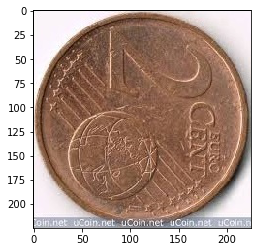

In [20]:
# Prueba nueva imagen con otro tamaño
img1 = Image.open('./Inputs/coins/2c/img_90_720.jpg')
plt.imshow(img1)
img1.size


(70, 70)

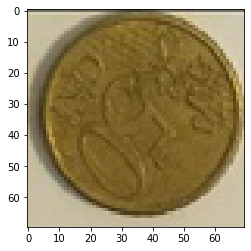

In [21]:
img1R = Image.open('Inputs/coins/50c/resized/img_90_62.jpg')
plt.imshow(img1R)
img1R.size

In [22]:
# Importamos la funcion rotarImgX para rotar las imagenes y guardarlas os grados que queramos.
# Con esto aumentamos el tamaño de la muestra para homogeneizar la cantidad de imagenes de cada label
from src.imgModifier import rotarImgX

In [23]:
coins_cruces['label'].value_counts()

2e     1000
1e     1000
2c      810
50c     535
10c     525
5c      516
20c     514
1c      506
Name: label, dtype: int64

In [58]:
# Rotamos 180 grados todas las imagenes de la carpeta 2c
# Vamos a rotar las imagenes de las carpetas que contengan menos cantidad para aumentar el dataset 
'''
path2c= './Inputs/coins/nuevas/50c'

rotarImgX(path2c,50)
'''

'Has creado 80 nuevas imagenes rotadas 50 grados'

(225, 225)

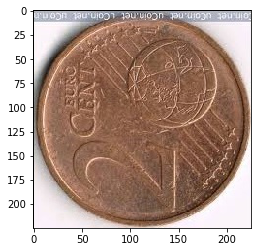

In [25]:
# Prueba de imagen rotada
img2 = Image.open('./Inputs/coins/2c/img_270_360.jpg')
plt.imshow(img2)
img2.size

In [176]:
import os
os.getcwd()
os.chdir("2c")

In [179]:
# Para el resize de las imagnes se ha creado un archivo resize.sh 
# En cada carpeta 'resized' dentro de cada carpeta con las imagenes originales(ej:'Input/coins/1e/resized') ejecutar:
# $ bash resize.sh

'''# !pip3 install python-resize-imag'''
from resizeimage import resizeimage

# Prueba para hacer resize de imagenes 
with open('./resized/img_45_9.jpg', 'r+b') as f:
    with Image.open(f) as image:
        print(image)
        cover = resizeimage.resize_cover(image, [70, 70])
        print(type(cover))
        cover.save('test1.jpeg', image.format)

UnidentifiedImageError: cannot identify image file <_io.BufferedRandom name='./resized/img_45_9.jpg'>

In [27]:
coins_cruces[['image','path']].head()

,image,path
0,"[[[93, 105, 111], [82, 94, 100], [85, 97, 103]...",Inputs/coins/10c/resized/img_90_270.jpg
1,"[[[125, 123, 123], [119, 119, 119], [108, 107,...",Inputs/coins/10c/resized/img_90_258.jpg
2,"[[[41, 98, 129], [93, 156, 184], [30, 91, 117]...",Inputs/coins/10c/resized/train_21_56.jpg
3,"[[[226, 228, 229], [226, 228, 229], [218, 220,...",Inputs/coins/10c/resized/test_18_24.jpg
4,"[[[61, 92, 123], [50, 81, 112], [61, 89, 119],...",Inputs/coins/10c/resized/IMG_4207_17.jpg


In [ ]:
coins_dataset.tail()

In [ ]:
'''
# Guardamos nuestro df en un archivo csv:
coins_cruces.to_pickle('./Output/coinsRes_cruces_5406.pkl')  
'''